<a href="https://colab.research.google.com/github/Hoa20146128/AI-Homework/blob/main/10_Vietnamese_dishes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10 Vietnamese dishes/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 91 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh_Mi': 0,
 'Banh_Uot': 1,
 'Banh_Xeo': 2,
 'Banh_beo': 3,
 'Bun_Bo': 4,
 'Bun_Cha': 5,
 'Che': 6,
 'Com_tam': 7,
 'Mi_Quang': 8,
 'Xoi': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size) 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
3/3 [==============================] - 24s 6s/step - loss: 2.6338 - accuracy: 0.1319
Epoch 2/100
3/3 [==============================] - 17s 5s/step - loss: 2.3333 - accuracy: 0.1099
Epoch 3/100
3/3 [==============================] - 17s 5s/step - loss: 2.2618 - accuracy: 0.1978
Epoch 4/100
3/3 [==============================] - 17s 5s/step - loss: 2.1935 - accuracy: 0.2527
Epoch 5/100
3/3 [==============================] - 17s 5s/step - loss: 2.0837 - accuracy: 0.2967
Epoch 6/100
3/3 [==============================] - 18s 5s/step - loss: 1.8311 - accuracy: 0.3736
Epoch 7/100
3/3 [==============================] - 18s 6s/step - loss: 1.6970 - accuracy: 0.4835
Epoch 8/100
3/3 [==============================] - 17s 5s/step - loss: 1.6061 - accuracy: 0.3956
Epoch 9/100
3/3 [==============================] - 17s 5s/step - loss: 1.4465 - accuracy: 0.4615
Epoch 10/100
3/3 [==============================] - 17s 6s/step - loss: 1.1437 - accuracy: 0.6264
Epoch 11/100
3/3 [===========

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0004708464548457414
Train Accuracy 1.0


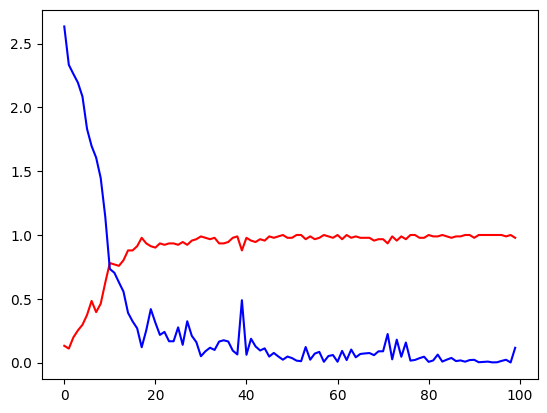

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'r', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [ ]:
# Lưu lại
model.save("10VNdishes.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model("10VNdishes.h5")

1/1 [==============================] - 0s 105ms/step
Mi_Quang


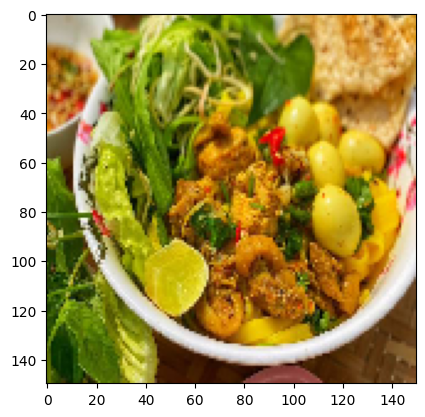

1/1 [==============================] - 0s 97ms/step
Mi_Quang


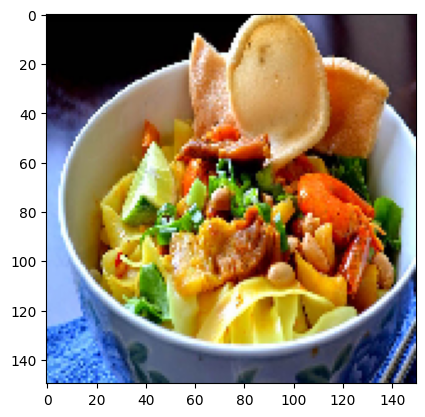

1/1 [==============================] - 0s 57ms/step
Xoi


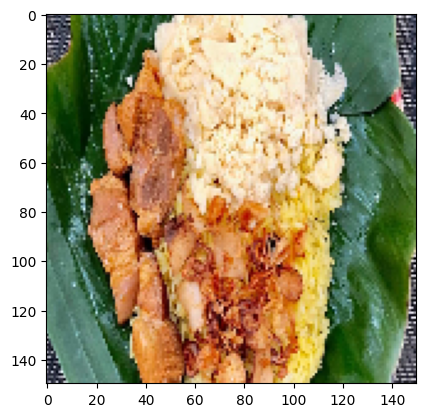

1/1 [==============================] - 0s 62ms/step
Xoi


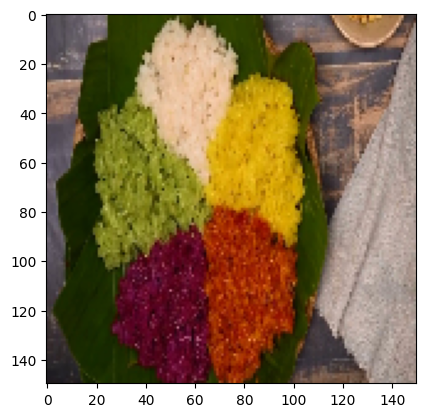

1/1 [==============================] - 0s 56ms/step
Com_tam


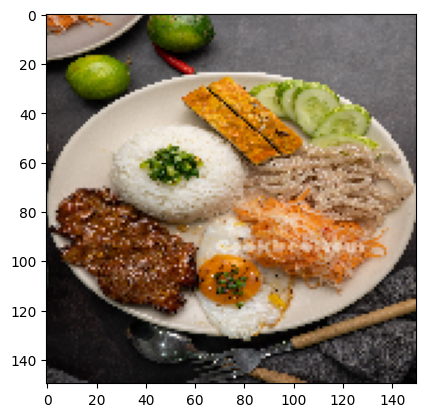

1/1 [==============================] - 0s 58ms/step
Com_tam


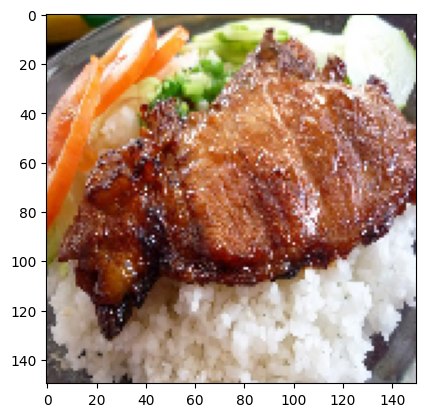

1/1 [==============================] - 0s 57ms/step
Bun_Cha


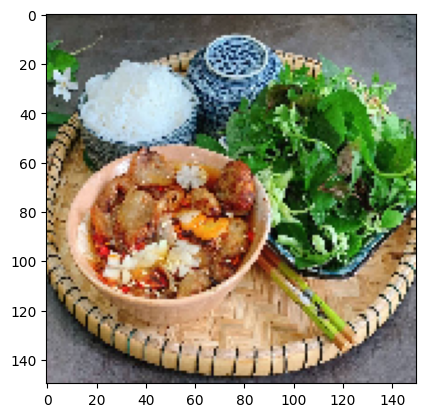

1/1 [==============================] - 0s 67ms/step
Bun_Cha


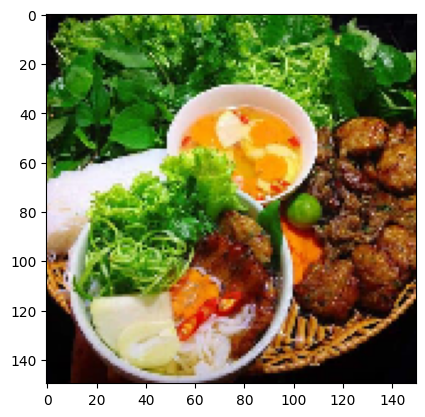

1/1 [==============================] - 0s 94ms/step
Che


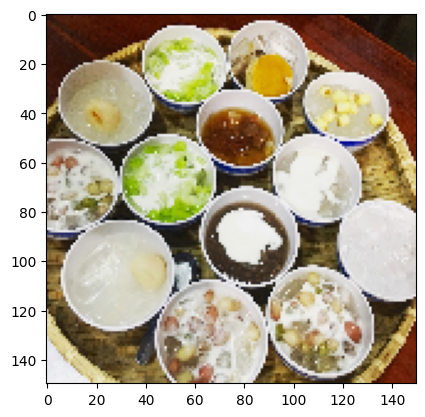

1/1 [==============================] - 0s 95ms/step
Che


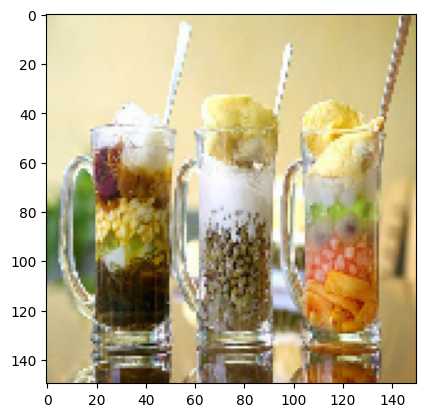

1/1 [==============================] - 0s 94ms/step
Banh_Mi


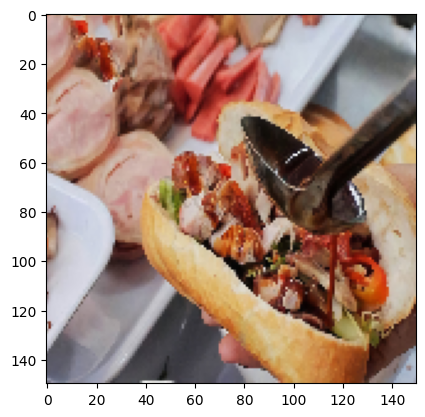

1/1 [==============================] - 0s 107ms/step
Banh_Mi


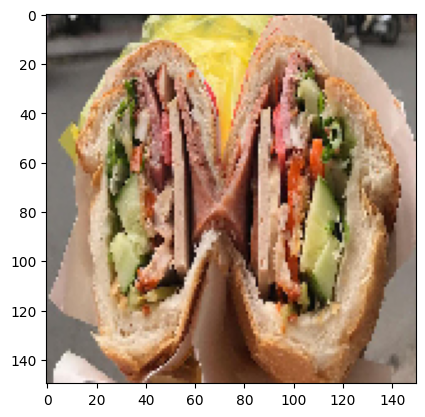

1/1 [==============================] - 0s 111ms/step
Banh_Uot


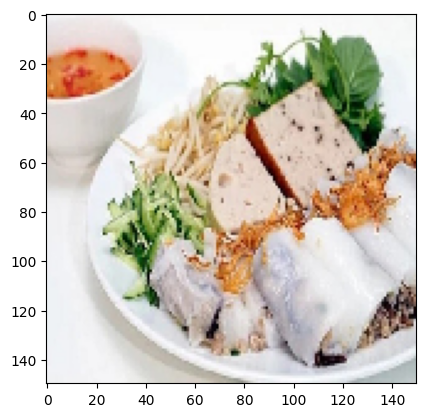

1/1 [==============================] - 0s 66ms/step
Banh_Uot


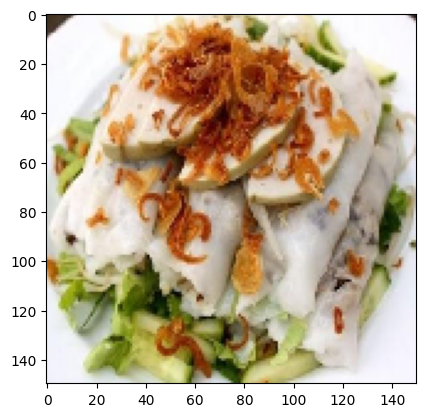

1/1 [==============================] - 0s 56ms/step
Banh_Xeo


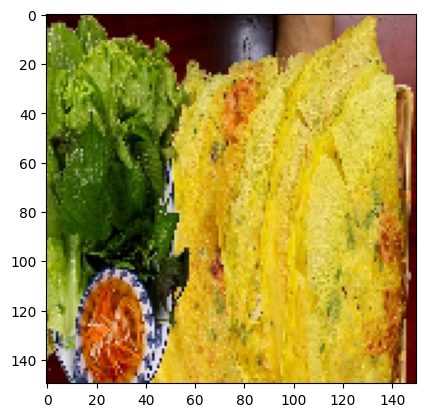

1/1 [==============================] - 0s 70ms/step
Banh_Xeo


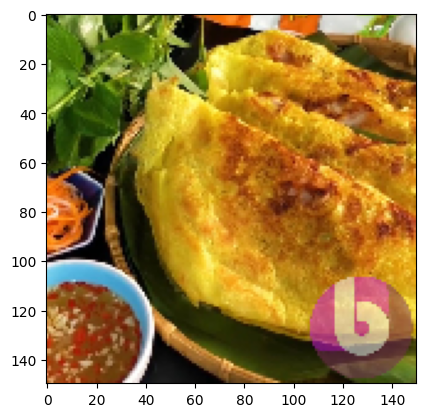

1/1 [==============================] - 0s 66ms/step
Bun_Bo


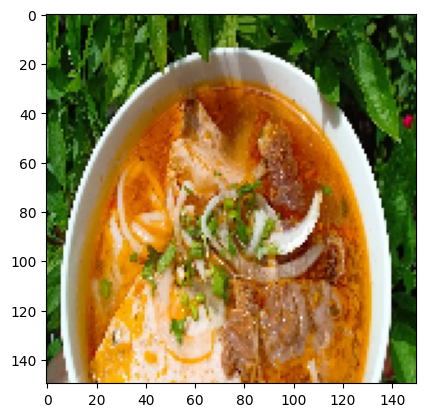

1/1 [==============================] - 0s 86ms/step
Bun_Bo


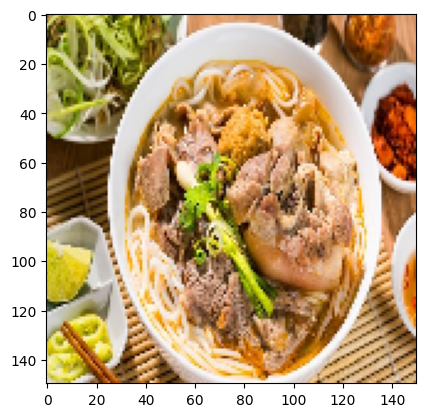

1/1 [==============================] - 0s 74ms/step
Banh_beo


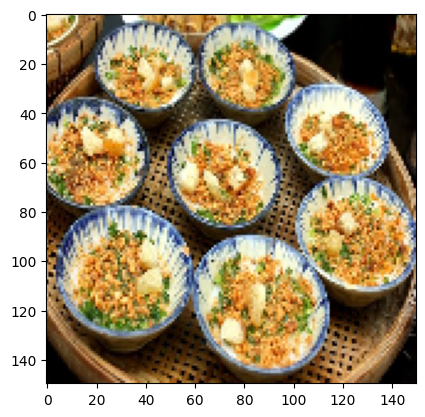

1/1 [==============================] - 0s 92ms/step
Banh_beo


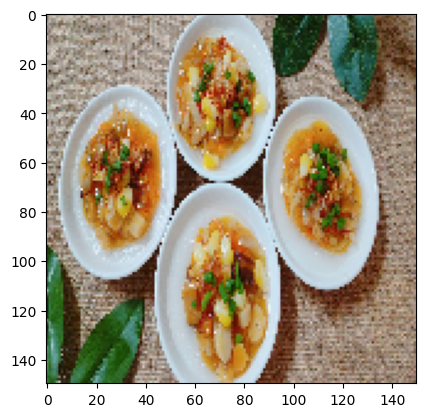

In [ ]:
test= "/content/drive/MyDrive/AI/10 Vietnamese dishes/Test"
# {'Banh_Mi': 0,
#  'Banh_Uot': 1,
#  'Banh_Xeo': 2,
#  'Banh_beo': 3,
#  'Bun_Bo': 4,
#  'Bun_Cha': 5,
#  'Che': 6,
#  'Com_tam': 7,
#  'Mi_Quang': 8,
#  'Xoi': 9}
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh_Mi'
  if round(result[0][1])==1:
    prediction='Banh_Uot'
  if round(result[0][2])==1:
    prediction='Banh_Xeo'
  if round(result[0][3])==1:
    prediction='Banh_beo'
  if round(result[0][4])==1:
    prediction='Bun_Bo'
  if round(result[0][5])==1:
    prediction='Bun_Cha'
  if round(result[0][6])==1:
    prediction='Che'
  if round(result[0][7])==1:
    prediction='Com_tam'
  if round(result[0][8])==1:
    prediction='Mi_Quang'
  if round(result[0][9])==1:
    prediction='Xoi'
  print(prediction)
  plt.show()